LIBRARIES

In [22]:
import numpy as np
from sklearn.decomposition import FastICA
import librosa
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io.wavfile import write
import librosa.display

1025 components for 8864 time samples, there is no point to show every component, so im showing only 9 of them
#using components none, make it automatic, based on audio


c:\Users\AirU\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


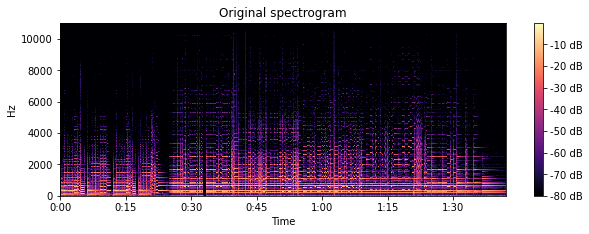

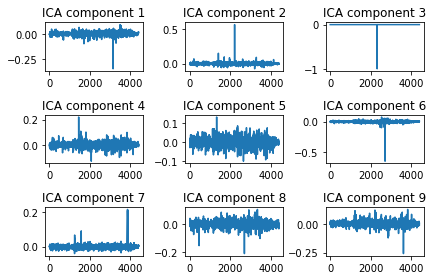

c:\Users\AirU\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\AirU\AppData\Local\Temp\ipykernel_6016\3830353589.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
C:\Users\AirU\AppData\Local\Temp\ipykernel_6016\3830353589.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
C:\Users\AirU\AppData\Local\Temp\ipykernel_6016\3830353589.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
C:\Users\AirU\AppData\Local\Temp\ipykernel_6016\3830353589.py:61: FutureWarning: The frame.append method is deprecated and will be remo

                                              Segment ICA Component  \
0   [0.9999981, 1.0000055, 0.9999939, 0.9999941, 1...             1   
1   [0.9999981, 1.0000055, 0.9999939, 0.9999941, 1...             2   
2   [0.9999981, 1.0000055, 0.9999939, 0.9999941, 1...             3   
3   [0.9999981, 1.0000055, 0.9999939, 0.9999941, 1...             4   
4   [0.9999981, 1.0000055, 0.9999939, 0.9999941, 1...             5   
5   [0.9999981, 1.0000055, 0.9999939, 0.9999941, 1...             6   
6   [0.9999981, 1.0000055, 0.9999939, 0.9999941, 1...             7   
7   [0.9999981, 1.0000055, 0.9999939, 0.9999941, 1...             8   
8   [0.9999981, 1.0000055, 0.9999939, 0.9999941, 1...             9   
9   [0.9102658, 0.8879448, 0.8658016, 0.8448746, 0...             1   
10  [0.9102658, 0.8879448, 0.8658016, 0.8448746, 0...             2   
11  [0.9102658, 0.8879448, 0.8658016, 0.8448746, 0...             3   
12  [0.9102658, 0.8879448, 0.8658016, 0.8448746, 0...             4   
13  [0

C:\Users\AirU\AppData\Local\Temp\ipykernel_6016\3830353589.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
C:\Users\AirU\AppData\Local\Temp\ipykernel_6016\3830353589.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
C:\Users\AirU\AppData\Local\Temp\ipykernel_6016\3830353589.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
C:\Users\AirU\AppData\Local\Temp\ipykernel_6016\3830353589.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
C:\Users\AirU\AppData\Local\Temp\ipykernel_6016\3830353589.py:61: FutureWarning: The frame.append method is deprecated and will 

In [ ]:
#PART 1


#Wczytujemy plik audio, obliczamy transformację fouriera 
#krótkiego czasu, co pozwala na analizę częstotliwości pliku audio

#uwzględniamy również minimalny błąd, w celu uniknięcia dzielenia przez 0
#wykonujemy konwersję do skali decybelowej
y, sr = librosa.load('melody2_nos.wav') # y - sygnał, sr - częstotliwość próbkowania
S_TFT = np.abs(librosa.stft(y)) # S_TFT - krótkoczasowa transformata Fouriera (STFT) sygnału y
# S_TFT przekształca sygnał dźwiękowy na dziedzinę częstotliwości, reprezentując go jako zbiór widm amplitudowych o różnych oknach czasowych
eps = 1e-7 
Amp_db = librosa.amplitude_to_db(S_TFT + eps, ref=np.max)

#Wykonujemy niezależną analizę składowych (ICA) do skali decybelowej,
#tym samym oddzielając źródła dzwięku

# ICA zakłada, że obserwowany sygnał, który jest kombinacją liniową różnych źródeł, może zostać zrekonstruowany poprzez dekompozycję na te źródła.

#W kontekście tego fragmentu kodu, ICA jest wykorzystywana do oddzielenia źródeł dźwięku z reprezentacji spektrogramu w skali decybelowej.
# Zadaniem ICA jest znalezienie takiej macierzy transformacji, która przekształci mieszane składowe spektrogramu na niezależne składowe źródeł dźwięku.
ica = FastICA(n_components=None)
ica_trans = ica.fit_transform(Amp_db.T)

#tworzymy wykres oryginalnego spektogramu
plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)
librosa.display.specshow(Amp_db, sr=sr, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Original spectrogram')
plt.show()


#transponujemy nasze ICA, po czym wyciągamy komponeny i tworzymy dla każdego z nich wykres
#transpozycję wykonujemy w celu uzyskania próbek odpowiadających konkretnym wierszom,
# a odpowiednich komponentów ICA kolumnom
ica_trans = ica_trans.T
for i, s in enumerate(ica_trans):
    if i >= 9: 
        break
    plt.subplot(3, 3, i + 1)
    plt.plot(s)
    plt.title('ICA component {}'.format(i+1))

plt.tight_layout()
plt.show()


#PART 2

#określamy sobię długość segmetów oraz liczbę próbek na każdy z nich
#jak i liczbę segmentów
segment_length = 20
num_samples_segment = sr * segment_length #sr - częstotliwość próbkowania
num_segments = int(np.floor(len(y) / num_samples_segment)) # y - sygnał, zaokrąglone w dół

#sciągamy dane do dataframe, dla każdego segmentu obliczamy STFT oraz jej konwersję DB
df = pd.DataFrame(columns=['Segment', 'ICA Component', 'Dominant frequency'])
for segment in range(num_segments):

    start = segment * num_samples_segment
    end = (segment + 1) * num_samples_segment
    segment = y[start:end]
    #STFT jest techniką analizy sygnału, która dzieli sygnał na ramki czasowe i przekształca je na dziedzinę częstotliwości. 
    # Wynikiem jest macierz reprezentująca widmo amplitudowe sygnału w różnych oknach czasowych.
    S_TFT = np.abs(librosa.stft(segment))
    # ref=np.max oznacza, że odniesieniem do obliczenia skali decybelowej jest maksymalna amplituda w całym spektrogramie.
    Amp_db = librosa.amplitude_to_db(S_TFT, ref=np.max) 

    #Stosujemy ICA dla każdego segmentu, wyciągamy 9 pierwszych komponentów
    #obliczamy fft w każdym z nich oraz identyfikujemy dominującą częstotliwość
    
    
#transponujemy nasze ICA, po czym wyciągamy komponeny i tworzymy dla każdego z nich wykres
#transpozycję wykonujemy w celu uzyskania próbek odpowiadających konkretnym wierszom, a odpowiednich komponentów ICA kolumnom
    ica = FastICA(n_components=None)
    ica_trans = ica.fit_transform(Amp_db.T)
    ica_trans = ica_trans.T  

    for i, s in enumerate(ica_trans):
        if i >= 9:
            break
#dla każdego komponentu ICA, stosowana jest transformata Fouriera (FFT) 
# w celu znalezienia dominującej częstotliwości

        fft = np.fft.fft(s)
        
        freqs = np.fft.fftfreq(len(s), 1/sr)
        idx = np.argmax(np.abs(fft))
        freq = freqs[idx]

        df = df.append({
            'Segment': segment + 1,
            'ICA Component': i + 1,
            'Dominant frequency': freq
        }, ignore_index=True)

print(df)


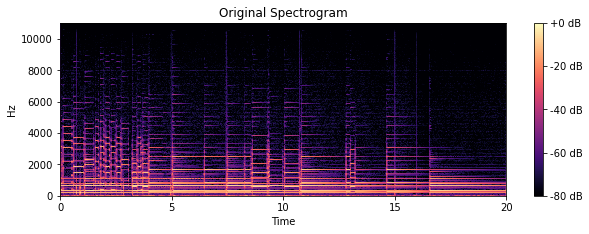

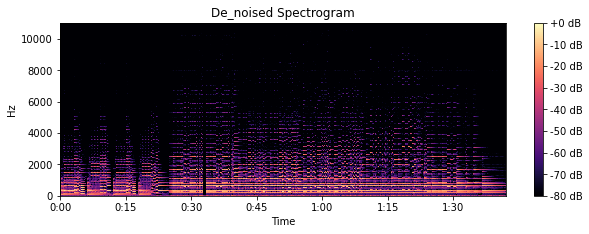

In [17]:
#wyodrębniamy składowe harmoniczne z audio
#Składowe harmoniczne to składowe dźwięku, 
# które są wielokrotnościami pewnej podstawowej częstotliwości, czyli dźwięków harmonicznych.
y_harmonic = librosa.effects.harmonic(y)

#wykonujemy na nich ICA, dla składowych harmonicznych
ica = FastICA(n_components=None)
ica_trans = ica.fit_transform(y_harmonic.reshape(-1, 1))

#reprezentuje informacje o miksowaniu składowych ICA w celu odtworzenia sygnału źródłowego.
# Każda kolumna w tej macierzy reprezentuje jedno źródło dźwięku, a wartości w kolumnach określają wagę,
# jaką każde źródło dźwięku wnosi do finalnego sygnału.
ica_mix = ica.mixing_

#odzyskujemy sygnał mnożąc macierz transformacji ICA przez macierz mieszania i sumowanie po osiach
recovered_signal = np.dot(ica_trans,ica_mix.T).sum(axis=1)
#Wykonujemy transformację STFT na odszumionym sygnale, aby otrzymać spektrogram odszumionego sygnału
Spectro_denoised = np.abs(librosa.stft(recovered_signal))

#Tworzymy spektogramy - oryginalny oraz odszumiony
plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(S_TFT, ref=np.max), sr=sr, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Spectrogram')
plt.show()

plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(Spectro_denoised, ref=np.max), sr=sr, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('De_noised Spectrogram')
plt.show()


#wyodrębnienie do pliku, skalowanie do audio 16 bitowego
recovered_signal_scaled = np.int16(recovered_signal/np.max(np.abs(recovered_signal)) * 32767)

write('de_noised.wav', sr, recovered_signal_scaled)


Poniższy kod rozpatrujemy oddzielnie, poza powyższymi komórkami

c:\Users\AirU\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


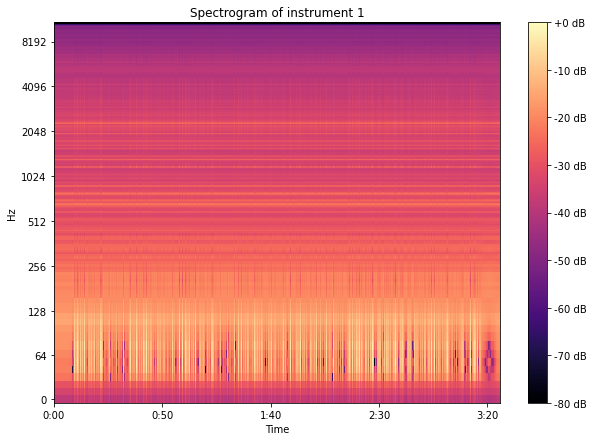

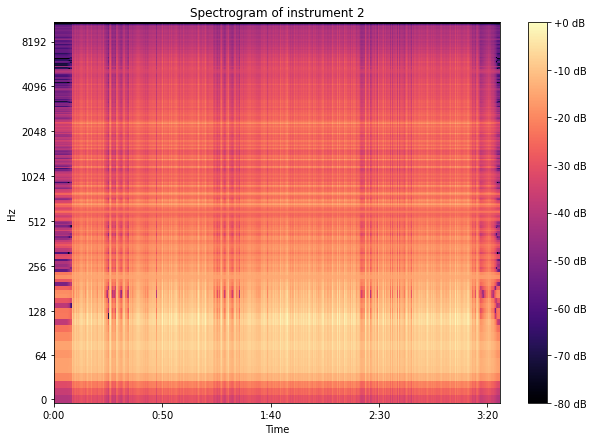

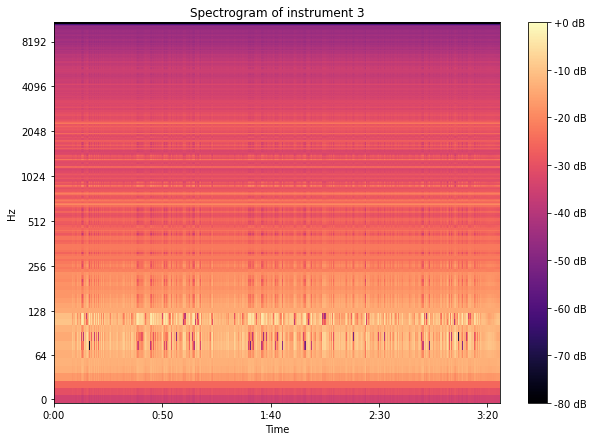

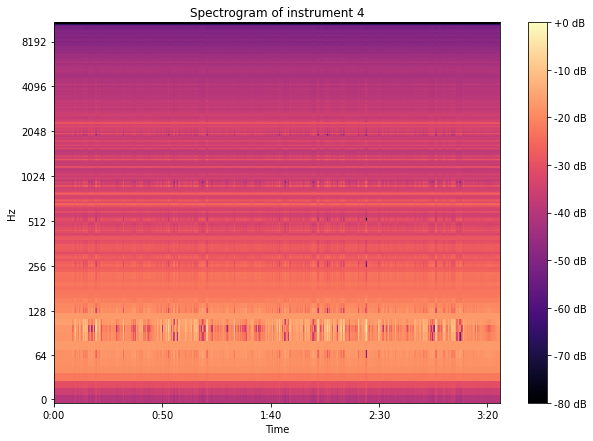

In [23]:
y, sr = librosa.load('tdh.wav')

STFT = np.abs(librosa.stft(y))

ica = FastICA(n_components=4)
STFT_T = ica.fit_transform(STFT.T) 

for i in range(STFT_T.shape[1]):
    plt.figure(figsize=(10, 7))

    reconstruction = np.dot(STFT_T[:, i:i+1], ica.mixing_.T[i:i+1, :]) + ica.mean_

    librosa.display.specshow(librosa.amplitude_to_db(np.abs(reconstruction.T), ref=np.max), sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram of instrument {i+1}')
    plt.show()

    signal = librosa.istft(reconstruction.T)

    signal_scaled = np.int16(signal/np.max(np.abs(signal)) * 32767)

    write(f'instrument_{i+1}.wav', sr, signal_scaled)